Dissertation
    
# **Notebook 6A: Ranking LSOAs and Analysis using NC data**
    
This notebook will use PCA to create scores for each LSOA, then calcualte change. This will be utilised to idenify ascending or descending LSOAs.

***

In [79]:
# Load packages

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx


# PCA

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection
import numpy as np

In [80]:
# Look at working dir

print("The working directory is " + os.getcwd())

The working directory is /home/jovyan/work/OneDrive/UCL/Dissertation/Notebooks V3


In [81]:
shapefiles = os.path.join("Shapefiles")

profiles = os.path.join("LSOA Profiles")

clean = os.path.join("Cleaned data")

In [82]:
def infodf(dataframe):
    print(f"There are "+str(len(dataframe)) + " rows in the dataframe")
    print(f"There are " + str(dataframe.shape[1]) + " columns in the data frame")
    print(f"The columns of the dataframe are: " + str(dataframe.columns))
    print(f"There are " + str(dataframe.isnull().sum().sum()) + " NaN values in the data frame")
    print(f"These NaN values are located in columns: " + str(dataframe.columns[dataframe.isnull().any()].tolist()))

# 1. Import in data

In [83]:
# Import data

variables = pd.read_csv(os.path.join(clean, "nc_ranking_vars.csv"))
variables = variables.drop("Unnamed: 0", axis=1)

In [84]:
# Split

vars_2014 = variables.filter(regex="_2014")
vars_2018 =  variables.filter(regex="_2018")

In [85]:
# Kent outline

outline = gpd.read_file(os.path.join(shapefiles, "KENT_OUTLINE.shp"))

# 3. Visualise

In [86]:
infodf(variables)

There are 902 rows in the dataframe
There are 7 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD', 'Income_2018', 'Income_2014', 'Median_house_prices_2014',
       'Median_house_prices_2018', 'prop_2014', 'prop_2018'],
      dtype='object')
There are 0 NaN values in the data frame
These NaN values are located in columns: []


findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


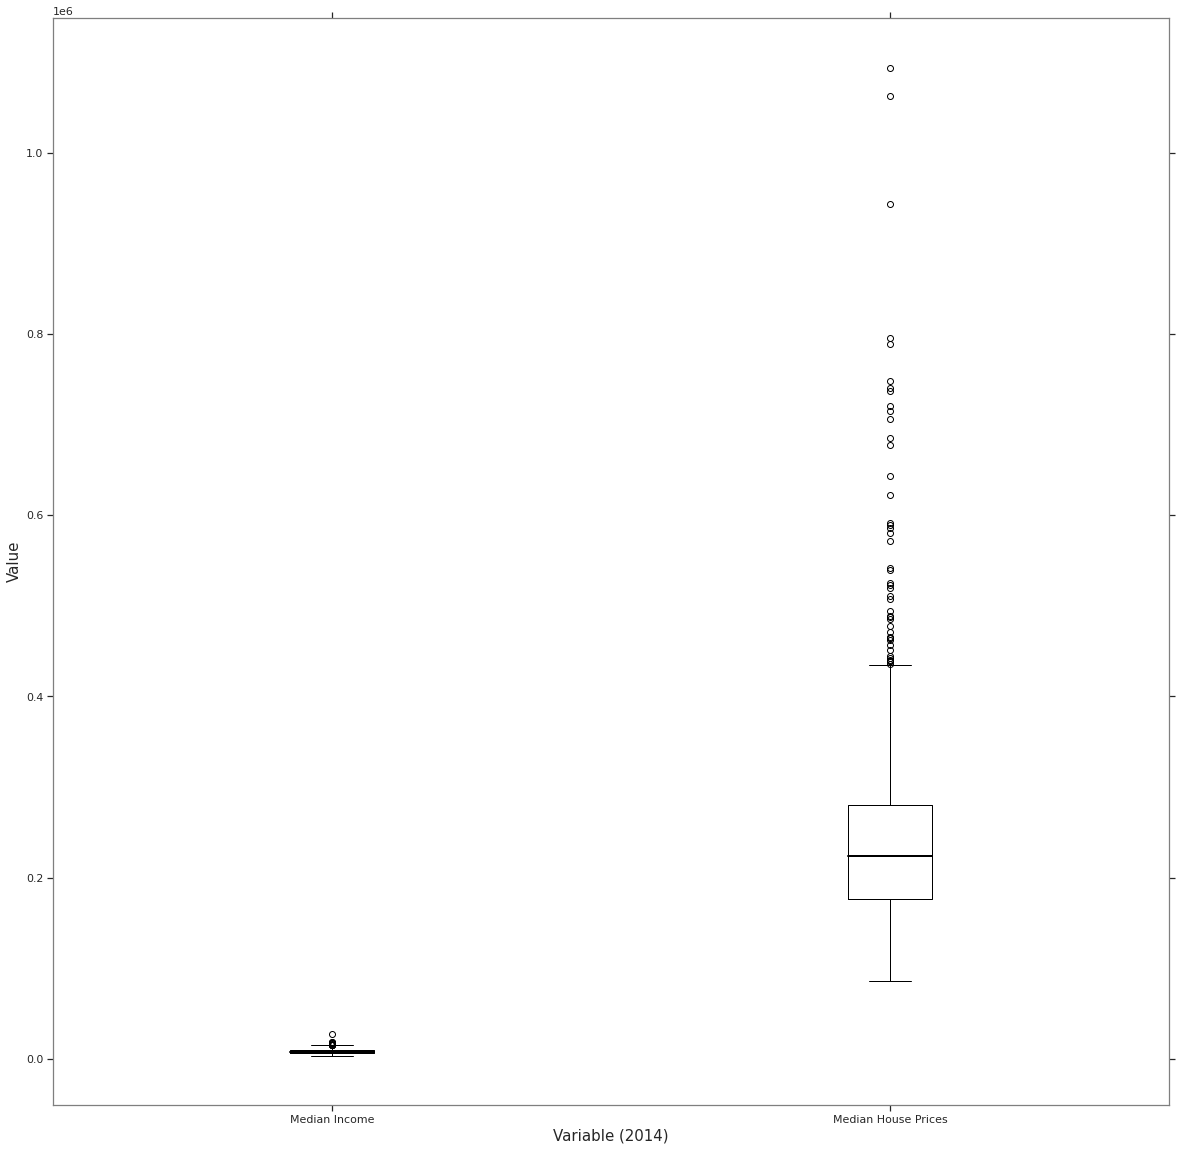

In [87]:
vars_2014_house_income = vars_2014[vars_2014.columns[0:2]]

labels = ["Median Income", "Median House Prices"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2014_house_income, labels=labels, boxprops= dict(linewidth=1.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Value", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2014)", fontsize=15)
plt.xticks(rotation=0)
plt.grid(True)
ax.ticklabel_format(axis="y", useOffset=False) 

plt.savefig(os.path.join("Figures", 'box_2014_ncvars_asc.png'), transparent=False, dpi=300)

plt.show()

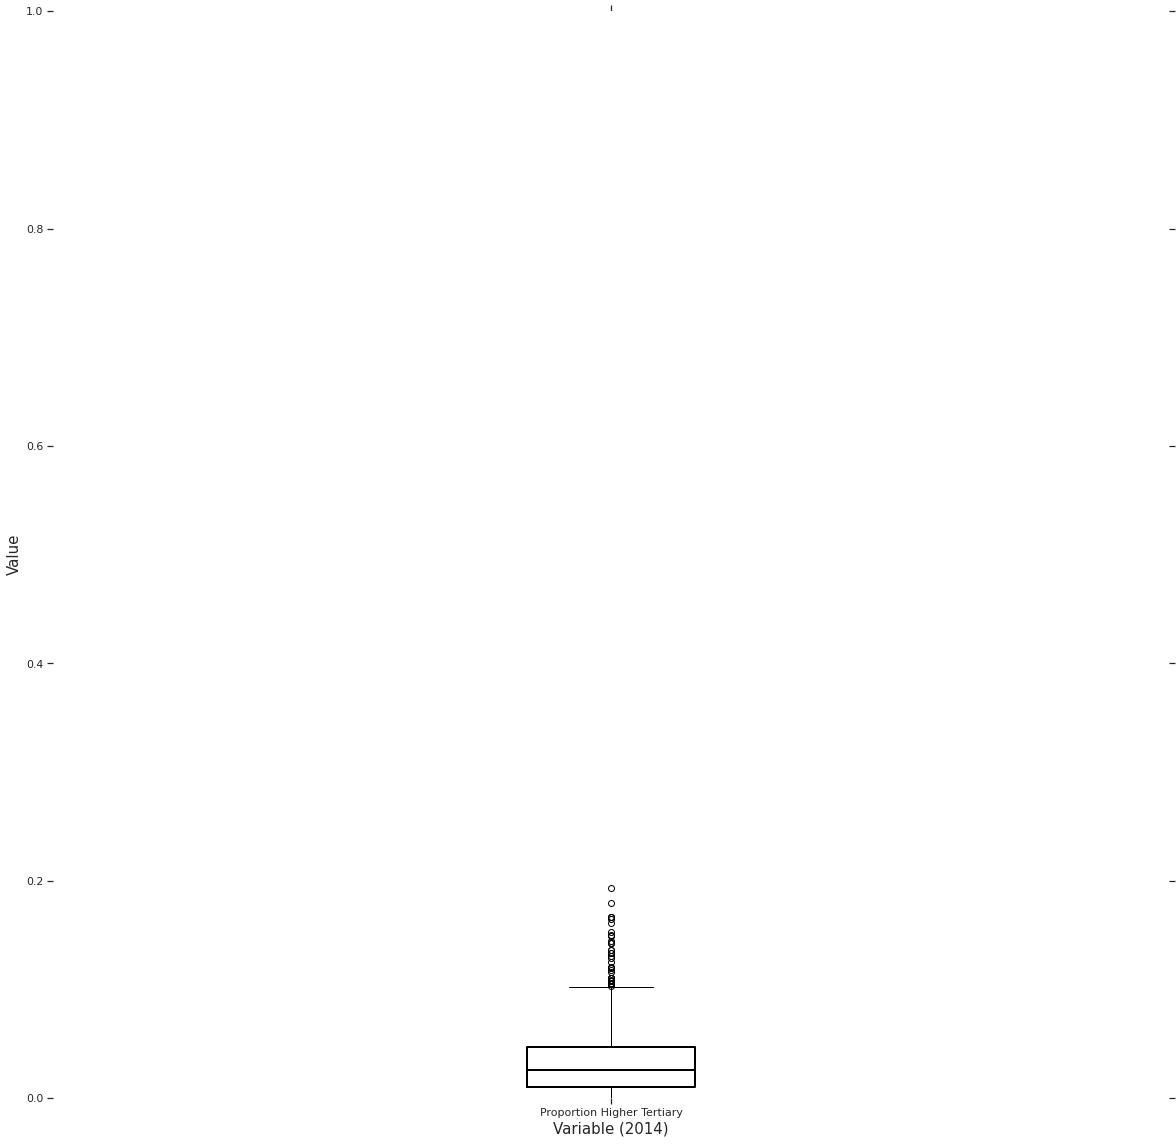

In [88]:
vars_2014_pro = vars_2014[vars_2014.columns[2:]]
labels = ["Proportion Higher Tertiary"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2014_pro, labels=labels, boxprops= dict(linewidth=2.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Value", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2014)", fontsize=15)
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.grid(True)

plt.savefig(os.path.join("Figures", 'box_2014_ncvars_prop_asc.png'), transparent=False, dpi=300)

plt.show()

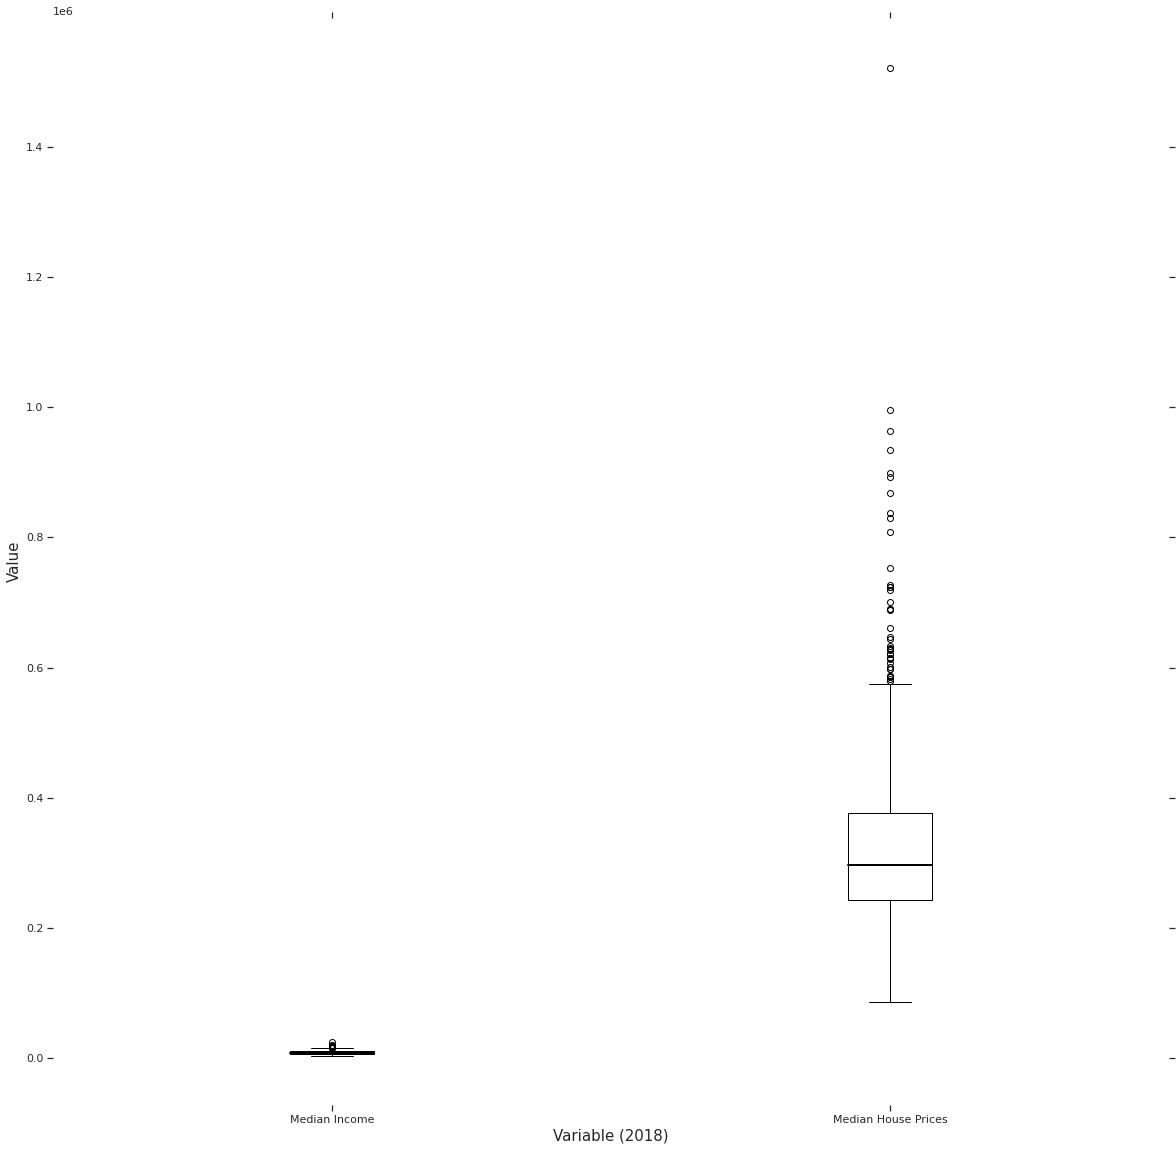

In [89]:
vars_2018_house_income = vars_2018[vars_2018.columns[0:2]]

labels = ["Median Income", "Median House Prices"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2018_house_income, labels=labels, boxprops= dict(linewidth=1.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Value", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2018)", fontsize=15)
plt.xticks(rotation=0)
plt.grid(True)
ax.ticklabel_format(axis="y", useOffset=False) 

plt.savefig(os.path.join("Figures", 'box_2018_ncvars_asc.png'), transparent=False, dpi=300)

plt.show()

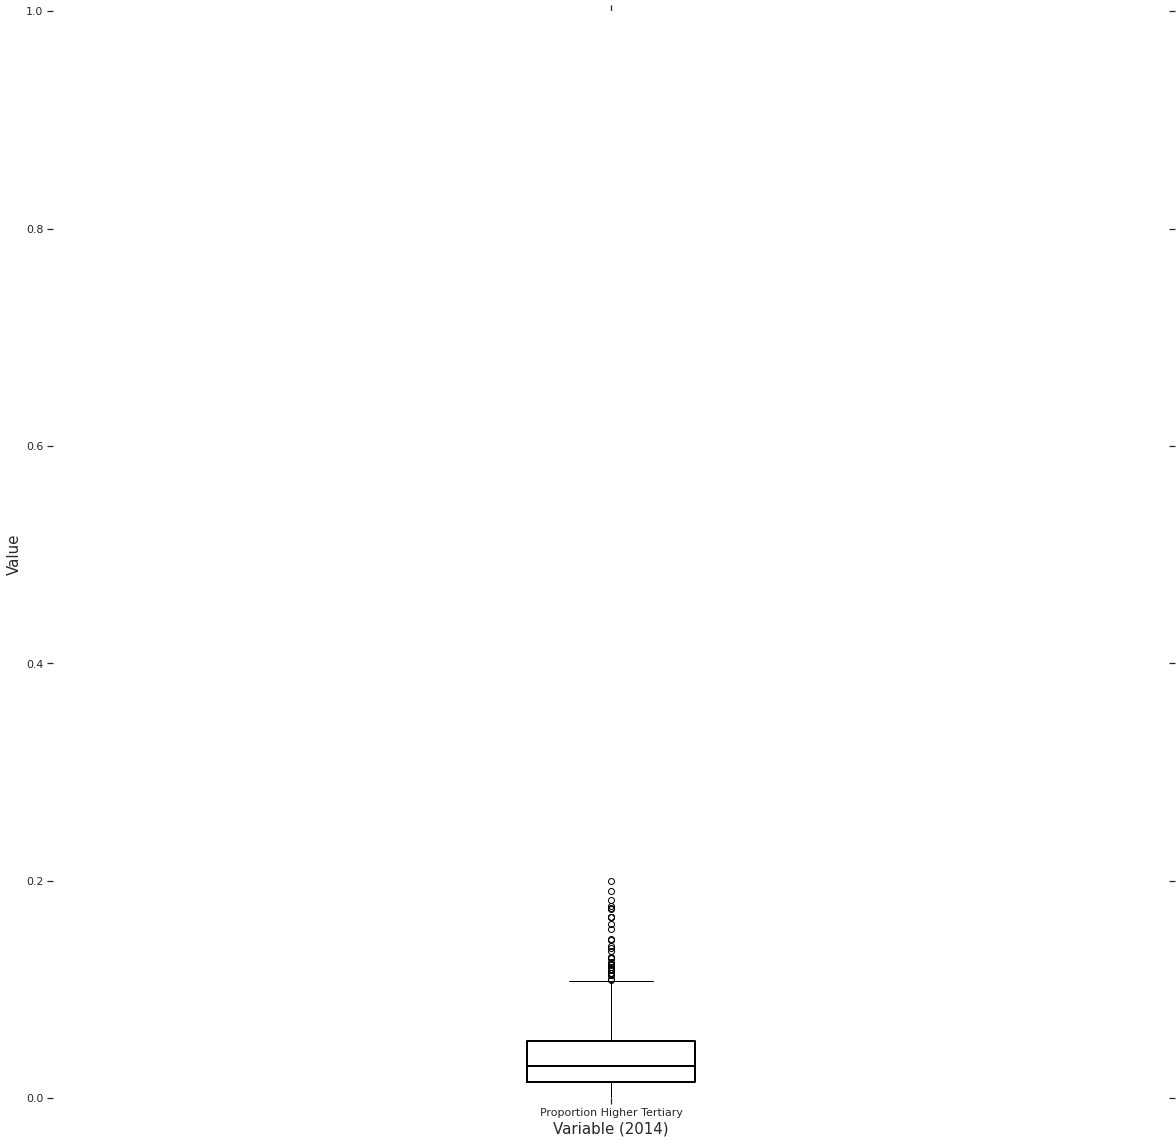

In [90]:
vars_2018_pro = vars_2018[vars_2018.columns[2:]]
labels = ["Proportion Higher Tertiary"]

fig, ax = plt.subplots(1, figsize=(20,20))

color_name = "tab:gray"

ax.spines["top"].set_color(color_name)
ax.spines["bottom"].set_color(color_name)
ax.spines["left"].set_color(color_name)
ax.spines["right"].set_color(color_name)

plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

medianprops = dict(color="black",linewidth=2)

ax.boxplot(vars_2018_pro, labels=labels, boxprops= dict(linewidth=2.0, color='black')
, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'), medianprops=medianprops)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.ylabel("Value", fontsize=15, fontname="Raleway")
plt.xlabel("Variable (2014)", fontsize=15)
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.grid(True)

plt.savefig(os.path.join("Figures", 'box_2018_ncvars_prop_asc.png'), transparent=False, dpi=300)

plt.show()

In [91]:
vars_2018.columns

Index(['Income_2018', 'Median_house_prices_2018', 'prop_2018'], dtype='object')

No handles with labels found to put in legend.


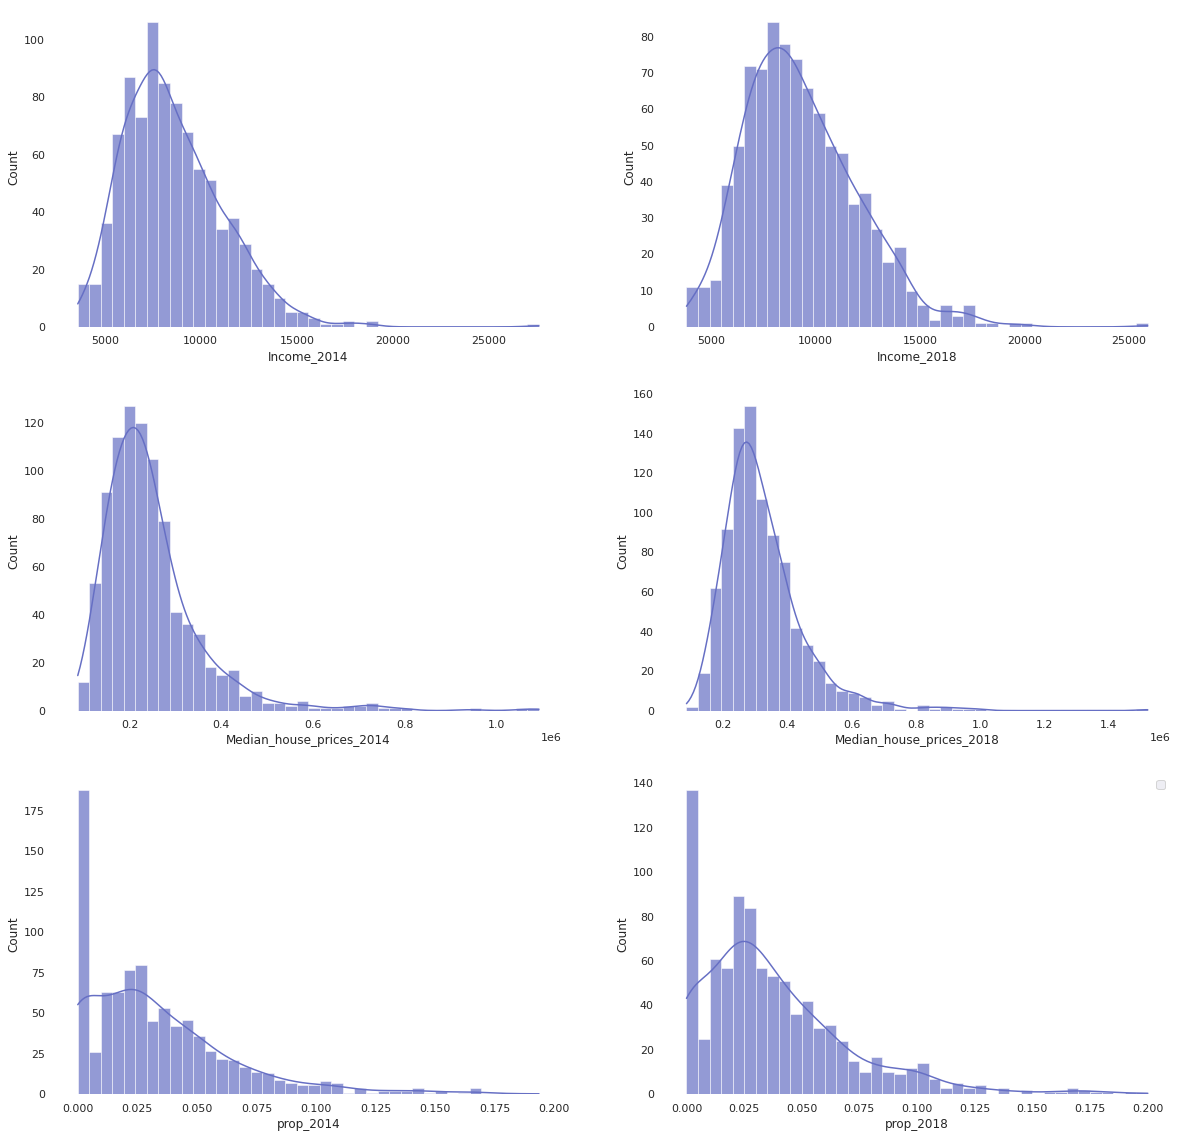

In [92]:
# Lets try and do histogram instead

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
sns.set()
sns.set_style("white")
sns.set(font_scale = 1)


sns.histplot(ax=axs[0,0],data=vars_2014, x="Income_2014", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[0,1],data=vars_2018, x="Income_2018", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[1,0],data=vars_2014, x="Median_house_prices_2014", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[1,1],data=vars_2018, x="Median_house_prices_2018", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[2, 0],data=vars_2014, x="prop_2014", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[2,1],data=vars_2018, x="prop_2018", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

plt.savefig(os.path.join("Figures", 'hist_nc_unscaled_vars_asc.png'), transparent=False, dpi=300)

plt.legend() 
plt.show()

# 2. Scaling

In [93]:
# Import 

scale = variables.set_index('LSOA11CD')

In [94]:
values_2014 = vars_2014.values
values_2018 = vars_2018.values
stacked_df = np.concatenate((values_2014, values_2018), axis=0)

In [95]:
print("There are " + str(np.isnan(stacked_df).sum()) + " Nan values")


There are 0 Nan values


In [96]:
Robust_transformer = RobustScaler().fit(stacked_df)
Robust_transformer_df = Robust_transformer.transform(stacked_df)
Robust_transformer_df

array([[-0.71092639, -0.64120698, -0.76158257],
       [-0.6294674 , -0.96369637, -0.76158257],
       [-0.93639685, -0.91937765, -0.76158257],
       ...,
       [ 0.32970677, -0.50919378, -0.76158257],
       [ 0.13389895,  0.64873173, -0.76158257],
       [-0.7535235 , -1.3088166 ,  0.0142795 ]])

In [97]:
Standard_transformer = StandardScaler().fit(stacked_df)
Standard_transformer_df = Standard_transformer.transform(stacked_df)
Standard_transformer_df

array([[-1.07617095, -0.87273534, -1.09193423],
       [-0.96971123, -1.21079862, -1.09193423],
       [-1.37084099, -1.16433963, -1.09193423],
       ...,
       [ 0.28384495, -0.73434686, -1.09193423],
       [ 0.02794137,  0.47949801, -1.09193423],
       [-1.13184163, -1.57258564, -0.21014573]])

In [98]:
scaled_df_2014 = pd.DataFrame(Robust_transformer_df[0:len(vars_2014),], index=vars_2014.index, columns=list(vars_2014.columns))
scaled_df_2018 = pd.DataFrame(Robust_transformer_df[len(vars_2018):,], index=vars_2018.index, columns=list(vars_2018.columns))

No handles with labels found to put in legend.


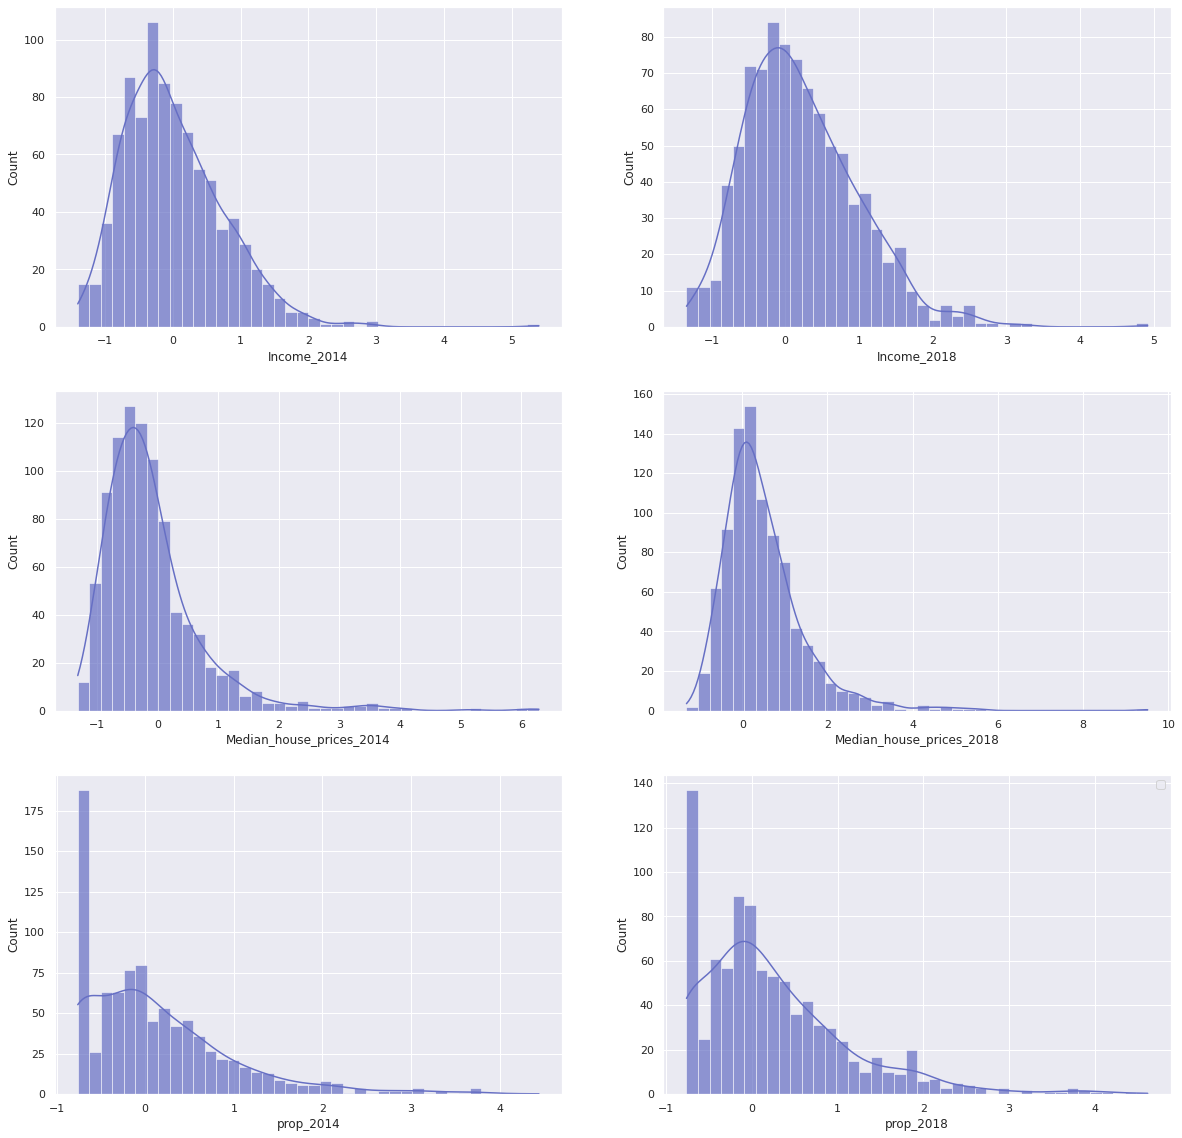

In [99]:
# Lets try and do histogram instead

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
sns.set()
sns.set_style("white")
sns.set(font_scale = 1)


sns.histplot(ax=axs[0,0],data=scaled_df_2014, x="Income_2014", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[0,1],data=scaled_df_2018, x="Income_2018", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[1,0],data=scaled_df_2014, x="Median_house_prices_2014", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[1,1],data=scaled_df_2018, x="Median_house_prices_2018", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

sns.histplot(ax=axs[2, 0],data=scaled_df_2014, x="prop_2014", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)
sns.histplot(ax=axs[2,1],data=scaled_df_2018, x="prop_2018", kde=True, legend = True, color="#666fc4", linewidth=0.5, alpha=0.7, bins=40)

plt.savefig(os.path.join("Figures", 'hist_nc_scaled_vars_asc.png'), transparent=False, dpi=300)

plt.legend() 
plt.show()


In [100]:
scaled_df_2014_stand = pd.DataFrame(Standard_transformer_df[len(vars_2014):,], index=vars_2014.index, columns=list(vars_2014.columns))
scaled_df_2018_stand = pd.DataFrame(Standard_transformer_df[len(vars_2018):,], index=vars_2018.index, columns=list(vars_2018.columns))

# 3. PCA

3.1 All variables

In [101]:
# carry out PCA to derive only the 1st principal component

pca = decomposition.PCA(n_components=1)             
pca.fit(Robust_transformer_df)                      
PCA_scores = pd.DataFrame(pca.transform(Robust_transformer_df))  

print("Explained variance of the SES score when using robust is is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score when using robust is is: 0.49615


In [102]:

pca = decomposition.PCA(n_components=1)             
pca.fit(Standard_transformer_df)                      
PCA_scores_stand = pd.DataFrame(pca.transform(Standard_transformer_df))  

print("Explained variance of the SES score when using Standard is is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score when using Standard is is: 0.48559


In [119]:
# what if one wanted to find all principal components?

pca_all = decomposition.PCA()             
pca_all.fit(Robust_transformer_df)                      
print(pca_all.explained_variance_ratio_)

[0.49615144 0.32135367 0.18249489]


In [104]:
pca_all_stan = decomposition.PCA()             
pca_all_stan.fit(Standard_transformer_df)                      
print(pca_all_stan.explained_variance_ratio_)

[0.48558995 0.31418801 0.20022204]


In [120]:
pca_all.components_

array([[ 0.48048295,  0.80970951,  0.33690748],
       [-0.1482615 , -0.30363296,  0.94118306],
       [ 0.86438109, -0.50217282, -0.02584171]])

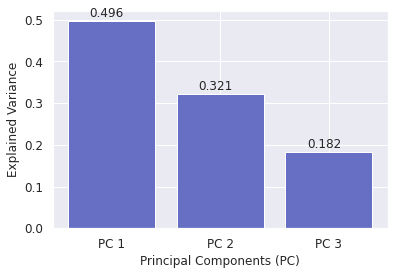

In [105]:
# visualise explained variance for each PC

plt.bar(['PC 1', 'PC 2', 'PC 3'],pca_all.explained_variance_ratio_, color="#666fc4")

x = [1,2,3]

for i in range(len(pca_all.explained_variance_ratio_)):
    plt.text(x = x[i]-1.2, y = pca_all.explained_variance_ratio_[i] + 0.01, s = pca_all.explained_variance_ratio_[i].round(3), size = 12)
    
plt.xlabel('Principal Components (PC)', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(os.path.join("Figures", 'bar_nc_cat_explained_PCA_asc.png'), dpi = 300, bbox_inches = "tight", transparent=True)

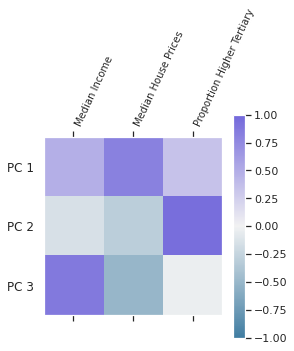

In [117]:
# visualise the constituents of each PC using heatmap

features = ['Median Income', 'Median House Prices', 'Proportion Higher Tertiary']
cmap = sns.diverging_palette(235.5, 268.1, as_cmap=True)

plt.matshow(pca_all.components_,cmap=cmap)
plt.yticks([0,1,2],['PC 1','PC 2','PC 3'],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left',fontsize=10)
plt.grid(b=None, which = "major")#
#plt.tight_layout()
plt.clim(-1,1)  # identical to caxis([-4,4]) in MATLAB

plt.savefig(os.path.join("Figures", 'heat_nc_all_vars_explained_PCA_asc.png'),  bbox_inches='tight')
plt.show()


In [29]:
PCA_2014 = pd.DataFrame(PCA_scores.iloc[0:len(vars_2014),])
PCA_2018 = pd.DataFrame(PCA_scores.iloc[len(vars_2018):,])

In [30]:
# renaming their column titles

PCA_2014 = PCA_2014.rename(columns={0: "Score_2014"})
PCA_2018 = PCA_2018.rename(columns={0: "Score_2018"})


In [31]:
# attaching the 2014 scores to their respective LSOAs in the main dataframe (df_score)

df_score = scale.reset_index()
df_score["Score_2014"] = PCA_2014[:]

In [32]:
# PCA_2018 requires further resetting of the index propr to attaching them to the main dataframe

PCA_2018 = PCA_2018.reset_index()
PCA_2018 = PCA_2018.drop(columns="index")
df_score["Score_2018"] = PCA_2018

In [33]:
df_score["Rank_2014"] = df_score["Score_2014"].rank(ascending=False)
df_score["Rank_2018"] = df_score["Score_2018"].rank(ascending=False)

In [34]:
# quantifying the change in LSOA's ranks between the 2 years

df_score["Rank_chg"] = df_score["Rank_2014"] - df_score["Rank_2018"]

In [35]:
df_score["Rank_chg"].describe()


count    902.000000
mean       0.000000
std      115.159206
min     -484.000000
25%      -60.000000
50%       -1.000000
75%       52.750000
max      492.000000
Name: Rank_chg, dtype: float64

In [36]:
# compute z-scores of rank changes

from scipy.stats import zscore

df_score["Z_score"] = df_score[["Rank_chg"]].apply(zscore)

In [37]:
# as a supplementart approach - changes in LSOAs' scores are computed

df_score["score_chg"]= df_score["Score_2018"] - df_score["Score_2014"]

In [38]:
# checking the top and bottom 5th percentile benchmarks for score changes

print(df_score["score_chg"].quantile(0.95))
print(df_score["score_chg"].quantile(0.15))

1.3465345506333686
0.25321881185278655


In [39]:
# Create spatial 

kent_2011 = gpd.read_file(os.path.join(shapefiles, "LSOA_KENT_2011.shp"))
df_score = pd.merge(df_score, kent_2011, on="LSOA11CD", how="right")
df_score = gpd.GeoDataFrame(df_score, geometry=(df_score["geometry"]))

In [40]:
kent_2011

,LSOA11CD,LSOA11NM,geometry
0,E01023972,Ashford 006A,"POLYGON ((602494.344 141509.244, 602498.426 14..."
1,E01023973,Ashford 005A,"POLYGON ((601527.620 141293.178, 601527.125 14..."
2,E01023974,Ashford 007A,"POLYGON ((599609.242 141534.213, 599612.382 14..."
3,E01023975,Ashford 007B,"POLYGON ((599541.509 141383.033, 599540.728 14..."
4,E01023976,Ashford 008A,"POLYGON ((600185.589 141361.026, 600187.479 14..."
...,...,...,...
897,E01033211,Dover 012F,"POLYGON ((631998.105 141862.895, 632000.000 14..."
898,E01033212,Shepway 014C,"POLYGON ((622628.323 135841.733, 622619.469 13..."
899,E01033213,Shepway 002E,"POLYGON ((620229.159 139097.666, 620229.125 13..."
900,E01033214,Shepway 002F,"POLYGON ((620865.861 139274.269, 620856.245 13..."


In [41]:
# assign LSOA status based on: 
# (1) z-scores of rank changes (z<-1 signify that n'hood is in decline (DEC), -1<z<1 signifies that n'hood is stable (STB), z>1 signifies that n'hood is in ascension (ASC))
# (2) changes in LSOAs' scores are within the top or bottom 5th percentile (top 5th percentile: 'ASC' and bottom 5th percentile: 'DEC')

df_score["status"] = "STB"

for i in range(len(df_score)):
    if df_score["Z_score"][i] > 1 or df_score["score_chg"][i] > df_score["score_chg"].quantile(0.95):
        df_score["status"][i] = "ASC"
    elif df_score["Z_score"][i] < -1 or df_score["score_chg"][i] < df_score["score_chg"].quantile(0.05):
        df_score["status"][i] = "DEC"

/tmp/ipykernel_62/1374934915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score["status"][i] = "DEC"
/tmp/ipykernel_62/1374934915.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score["status"][i] = "ASC"


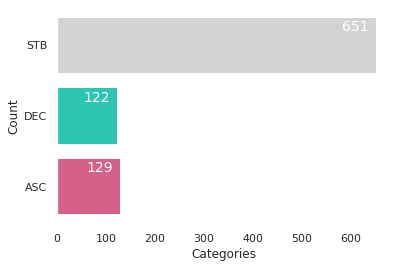

In [42]:
# Plot bar graph of counts

plt.rcParams['axes.facecolor'] = 'white'

# check dataframe

count = pd.DataFrame(df_score.groupby(df_score["status"]).size()).reset_index()
count = count.rename(columns={0:"count"})
count

fig, ax = plt.subplots()

index = ["Ascending", "Declining", "Stable"]
bar = plt.barh(count['status'], count['count'], color = [ "#d56187", "#2DC4B2", "lightgrey" ])

for i, v in enumerate(count["count"]):
    ax.text(v -68, i+.2, str(v), color='white', size=14)
    
plt.xlabel('Categories')
plt.ylabel('Count')

plt.savefig(os.path.join("Figures", 'bar_nc_asc_dec_asc.png'), transparent=True, dpi=300)

plt.show()


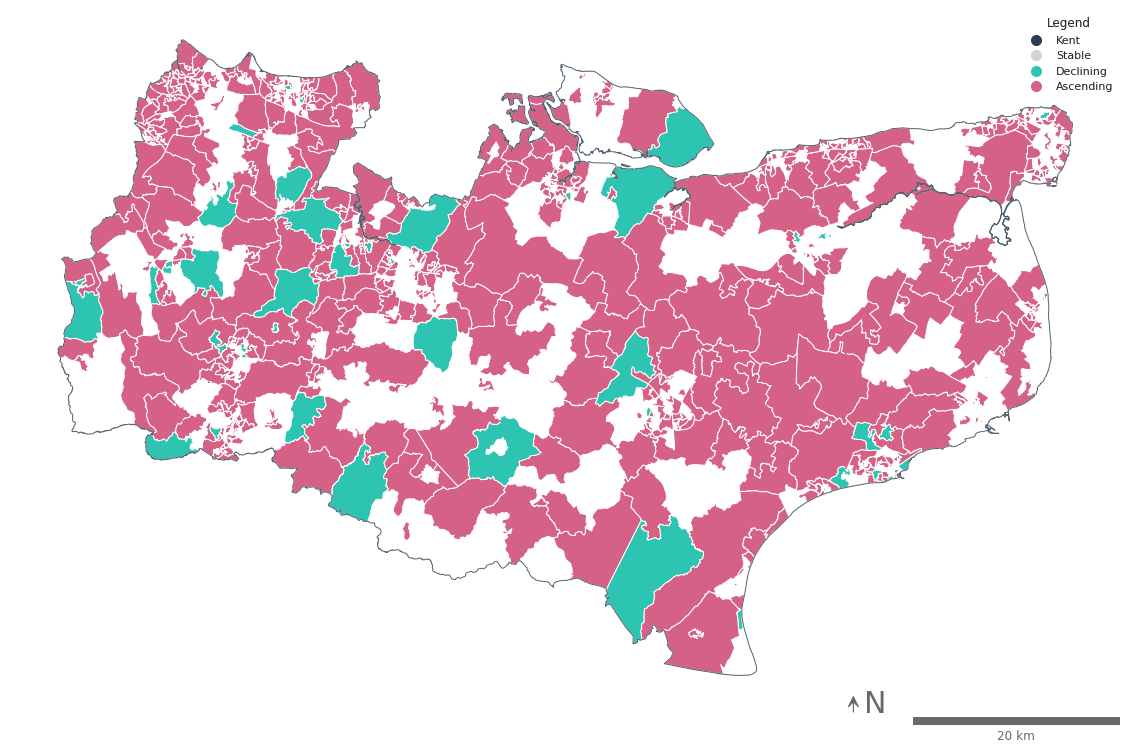

In [43]:
# Look at increase or decrease

# Visulise previous data on gentrification

# Filter by status, allowing control over colors of map
inc = df_score.loc[df_score['score_chg'] > 0.5]
dec = df_score.loc[df_score['score_chg'] <= 0 ]

# Plot shapfiles

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")


ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2018.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

dec.plot(ax=ax, facecolor="#2DC4B2")
inc.plot(ax=ax, facecolor="#d56187")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='#2DC4B2')
l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')

labels = ["Kent", "Stable","Declining", "Ascending"]
legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_nc_asc_dec_raw_all_vars.png'), transparent=True, dpi=300)

# Show map
plt.show()


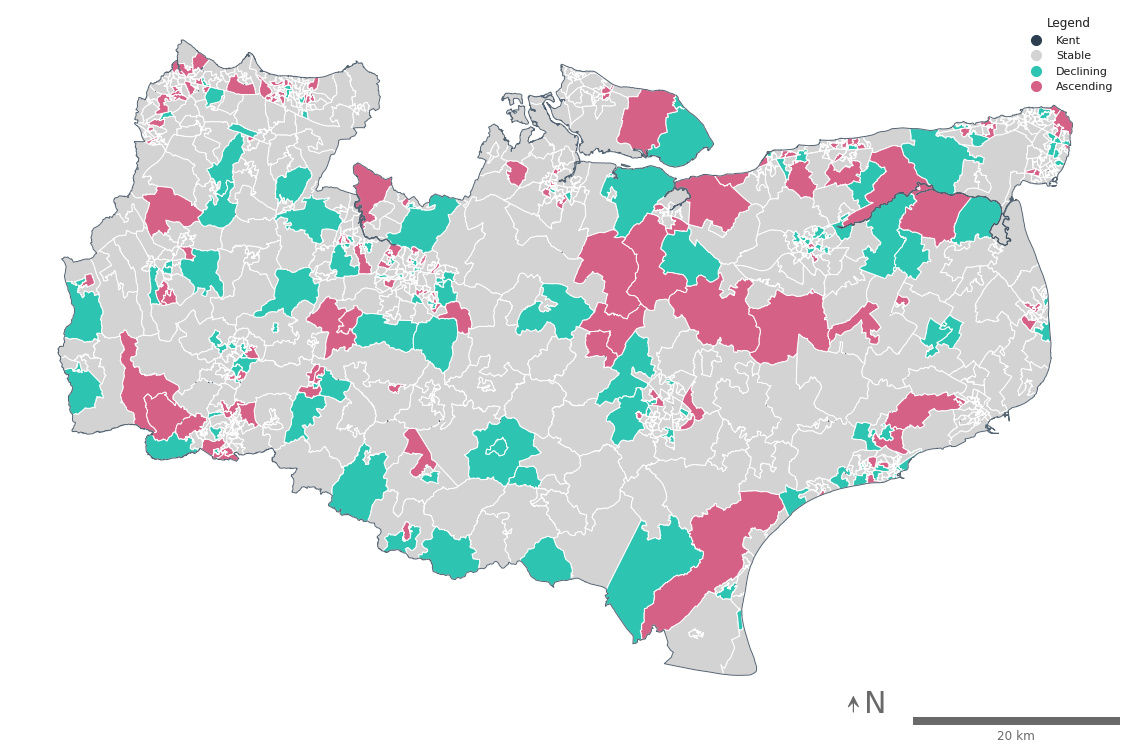

In [44]:
# Visulise ascending

# Filter by status, allowing control over colors of map
stb = df_score.loc[df_score['status'] == "STB"]
dec = df_score.loc[df_score['status'] == "DEC"]
asc = df_score.loc[df_score['status'] == "ASC"]

# Plot shapfiles

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")


ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2018.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="#2DC4B2")
asc.plot(ax=ax, facecolor="#d56187")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='#2DC4B2')
l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')

labels = ["Kent", "Stable","Declining", "Ascending"]
legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_nc_asc_all_vars.png'), transparent=True, dpi=300)

# Show map
plt.show()



In [45]:
df_score.columns

Index(['LSOA11CD', 'Income_2018', 'Income_2014', 'Median_house_prices_2014',
       'Median_house_prices_2018', 'prop_2014', 'prop_2018', 'Score_2014',
       'Score_2018', 'Rank_2014', 'Rank_2018', 'Rank_chg', 'Z_score',
       'score_chg', 'LSOA11NM', 'geometry', 'status'],
      dtype='object')

In [46]:
df_score_filt = df_score[["LSOA11CD", 'LSOA11NM', 'Score_2014', 'Score_2018',
       'Rank_2014', 'Rank_2018', 'Rank_chg', 'Z_score', 'score_chg', 'status',
       'geometry']]

df_score_filt = df_score_filt.rename(columns={"status":"Level1Cat"})

# Add in regex 

df_score_filt = df_score_filt.add_suffix('_nc')


In [47]:
infodf(df_score_filt)

There are 902 rows in the dataframe
There are 11 columns in the data frame
The columns of the dataframe are: Index(['LSOA11CD_nc', 'LSOA11NM_nc', 'Score_2014_nc', 'Score_2018_nc',
       'Rank_2014_nc', 'Rank_2018_nc', 'Rank_chg_nc', 'Z_score_nc',
       'score_chg_nc', 'Level1Cat_nc', 'geometry_nc'],
      dtype='object')
There are 0 NaN values in the data frame
These NaN values are located in columns: []


In [48]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [49]:
df_score_filt.to_csv(os.path.join(clean, "level1_nc.csv"))

In [122]:
df_score.to_file(os.path.join(clean, "Level1_nc.shp"))

/tmp/ipykernel_62/3611929977.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df_score.to_file(os.path.join(clean, "Level1_nc.shp"))


In [51]:
df_score.loc[df_score["LSOA11CD"]=="E01024676"]

,LSOA11CD,Income_2018,Income_2014,Median_house_prices_2014,Median_house_prices_2018,prop_2014,prop_2018,Score_2014,Score_2018,Rank_2014,Rank_2018,Rank_chg,Z_score,score_chg,LSOA11NM,geometry,status
681,E01024676,8172.566406,7143.428223,115000.0,159500.0,0.02381,0.035398,-1.394269,-0.877184,829.0,822.0,7.0,0.060819,0.517085,Thanet 003A,"POLYGON ((635073.935 170422.561, 635073.314 17...",STB


In [52]:
df_score.loc[df_score["LSOA11CD"]=="E01024072"]

,LSOA11CD,Income_2018,Income_2014,Median_house_prices_2014,Median_house_prices_2018,prop_2014,prop_2018,Score_2014,Score_2018,Rank_2014,Rank_2018,Rank_chg,Z_score,score_chg,LSOA11NM,geometry,status
91,E01024072,8027.77002,7960.561035,275000.0,323750.0,0.022388,0.013889,-0.318482,-0.088567,394.0,556.0,-162.0,-1.407529,0.229915,Canterbury 008D,"POLYGON ((611139.612 167097.810, 611140.225 16...",DEC


In [53]:
asc.sort_values(by=["Z_score"])

,LSOA11CD,Income_2018,Income_2014,Median_house_prices_2014,Median_house_prices_2018,prop_2014,prop_2018,Score_2014,Score_2018,Rank_2014,Rank_2018,Rank_chg,Z_score,score_chg,LSOA11NM,geometry,status
474,E01024464,13937.719730,12016.279300,1093750.00,1521275.0,0.036364,0.078125,5.361944,8.613622,1.0,1.0,0.0,0.000000,3.251678,Sevenoaks 011E,"POLYGON ((551807.318 153792.052, 551813.688 15...",ASC
465,E01024455,10361.651370,9770.599609,706250.00,962500.0,0.012077,0.020833,2.468907,4.194014,16.0,4.0,12.0,0.104261,1.725107,Sevenoaks 015C,"POLYGON ((551610.615 145553.790, 551632.500 14...",ASC
817,E01024817,14545.135740,12864.553710,438750.00,660000.0,0.081967,0.066667,1.889971,3.331792,28.0,13.0,15.0,0.130327,1.441821,Tunbridge Wells 012B,"POLYGON ((558449.437 138172.875, 558448.215 13...",ASC
472,E01024462,10325.680660,9972.928711,585500.00,996000.0,0.070175,0.121212,2.285390,5.303331,19.0,2.0,17.0,0.147704,3.017942,Sevenoaks 012C,"POLYGON ((553318.634 153579.967, 553327.125 15...",ASC
495,E01024485,11997.536130,11627.719730,316000.00,481250.0,0.108108,0.139785,1.208510,2.555325,60.0,30.0,30.0,0.260653,1.346815,Sevenoaks 013E,"POLYGON ((544427.321 154178.660, 544425.258 15...",ASC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,E01024848,8688.230469,7876.864746,177500.00,501250.0,0.047619,0.000000,-0.696798,0.959784,557.0,198.0,359.0,3.119153,1.656582,Tunbridge Wells 003E,"POLYGON ((558254.488 142796.728, 558279.125 14...",ASC
611,E01024604,6792.431152,5612.390137,161250.00,238500.0,0.000000,0.105263,-1.536185,0.050353,855.0,490.0,365.0,3.171284,1.586538,Swale 014C,"POLYGON ((600391.124 162098.674, 600391.125 16...",ASC
557,E01024549,5859.333496,5273.400391,232000.00,487495.0,0.004854,0.007075,-1.106247,0.554334,724.0,314.0,410.0,3.562264,1.660581,Shepway 011E,"POLYGON ((606658.312 132642.498, 606662.000 13...",ASC
373,E01024360,8458.504883,7453.393555,169497.50,262500.0,0.000000,0.103448,-1.234900,0.407570,778.0,363.0,415.0,3.605706,1.642469,Maidstone 009A,"POLYGON ((573660.494 154446.506, 573651.000 15...",ASC


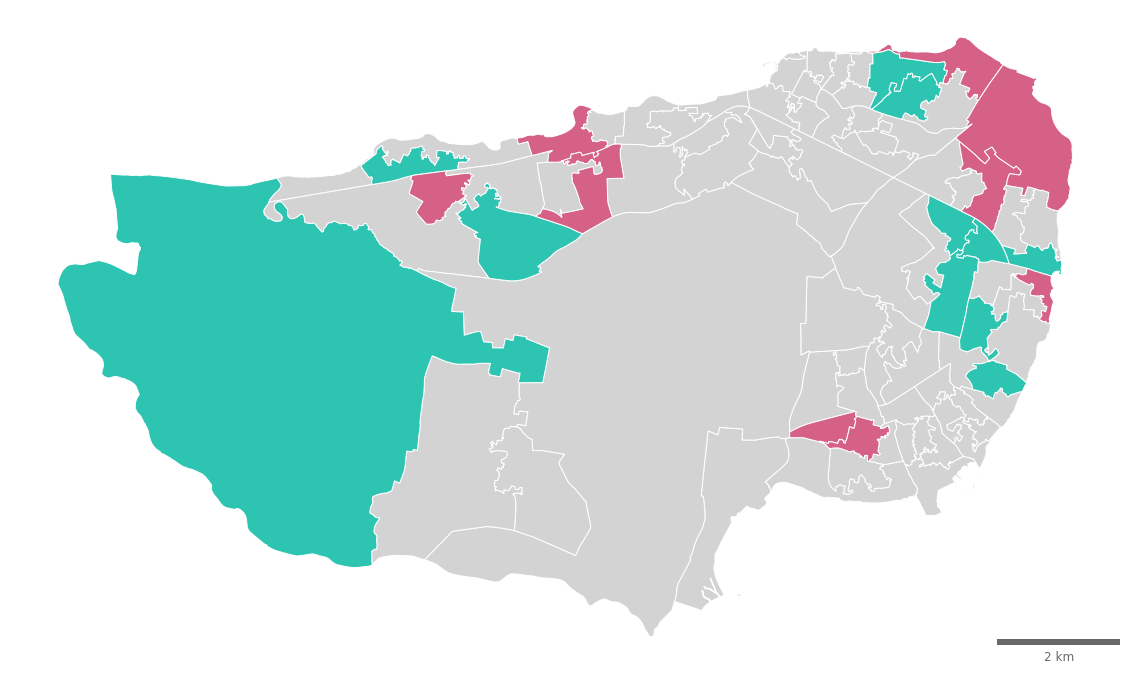

In [54]:
# Thanet

thanet = df_score[df_score['LSOA11NM'].str.contains("Thanet")]

# Visulise previous data on gentrification

# Filter by status, allowing control over colors of map
stb = thanet.loc[thanet['status'] == "STB"]
dec = thanet.loc[thanet['status'] == "DEC"]
asc = thanet.loc[thanet['status'] == "ASC"]

# Plot shapfiles

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")


ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
#df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
#outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2018.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

#ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
#ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="#2DC4B2")
asc.plot(ax=ax, facecolor="#d56187")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='#2DC4B2')
l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')

labels = ["Kent", "Stable","Declining", "Ascending"]
#legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
#ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_nc_than.png'), transparent=True, dpi=300)

# Show map
plt.show()



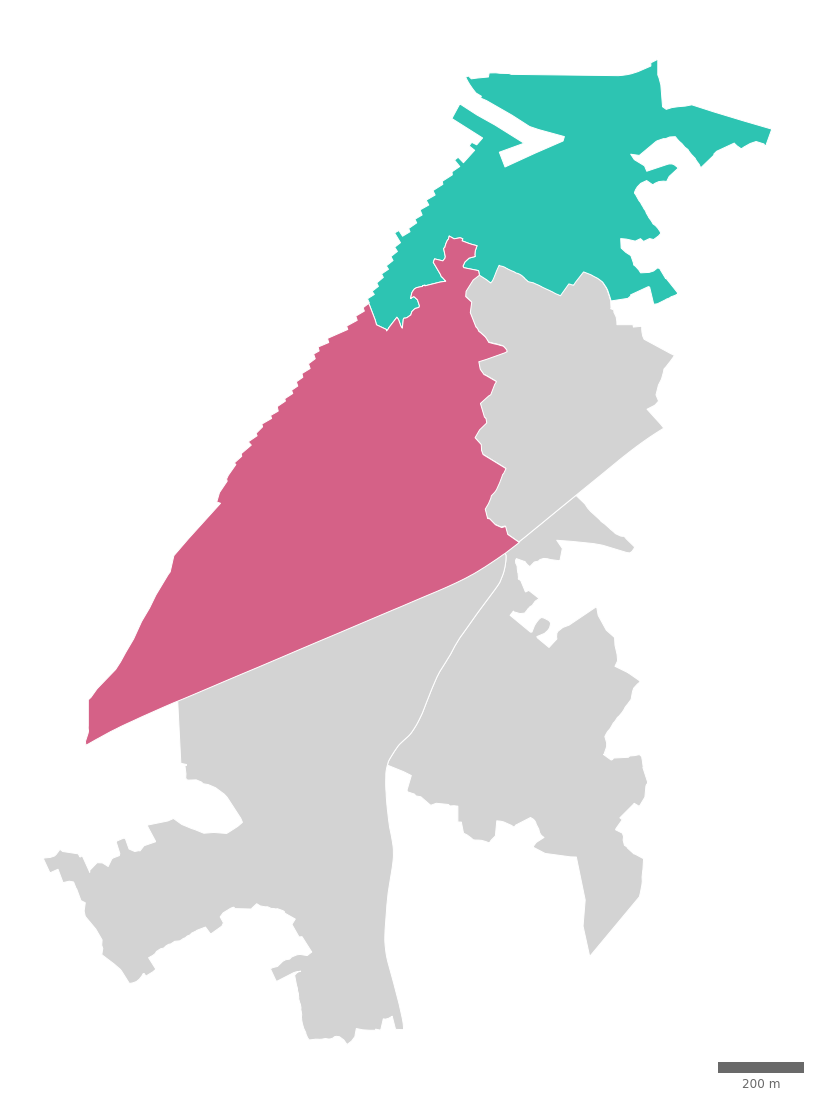

In [55]:
# whitable

whit = df_score[df_score['LSOA11NM'].str.contains("Canterbury 008")]

# Visulise previous data on gentrification

# Filter by status, allowing control over colors of map
stb = whit.loc[whit['status'] == "STB"]
dec = whit.loc[whit['status'] == "DEC"]
asc = whit.loc[whit['status'] == "ASC"]

# Plot shapfiles

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")


ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
#df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
#outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2018.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

#ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
#ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="#2DC4B2")
asc.plot(ax=ax, facecolor="#d56187")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='#2DC4B2')
l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')

labels = ["Kent", "Stable","Declining", "Ascending"]
#legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
#ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_nc_whit.png'), transparent=True, dpi=300)

# Show map
plt.show()

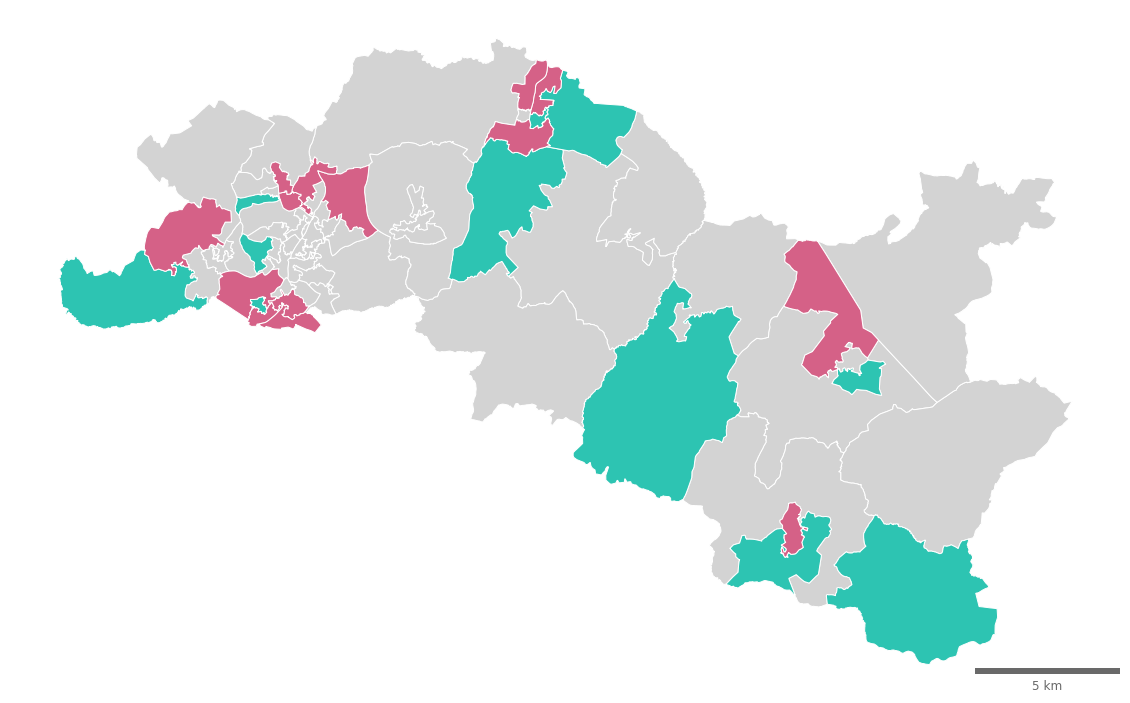

In [56]:
# tun

whit = df_score[df_score['LSOA11NM'].str.contains("Tunbridge Wells")]

# Visulise previous data on gentrification

# Filter by status, allowing control over colors of map
stb = whit.loc[whit['status'] == "STB"]
dec = whit.loc[whit['status'] == "DEC"]
asc = whit.loc[whit['status'] == "ASC"]

# Plot shapfiles

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")


ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
#df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
#outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2018.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

#ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
#ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="#2DC4B2")
asc.plot(ax=ax, facecolor="#d56187")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='#2DC4B2')
l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')

labels = ["Kent", "Stable","Declining", "Ascending"]
#legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
#ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_nc_tunbridge.png'), transparent=True, dpi=300)

# Show map
plt.show()

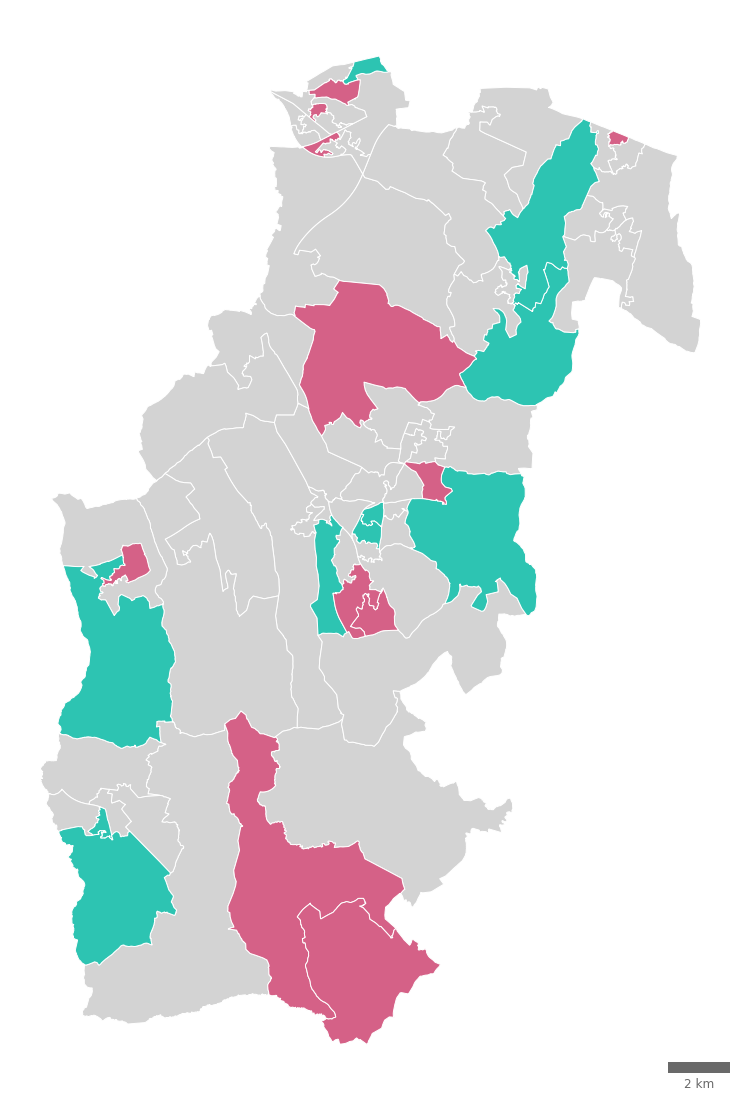

In [57]:
# seven oakes

whit = df_score[df_score['LSOA11NM'].str.contains("Sevenoaks")]

# Visulise previous data on gentrification

# Filter by status, allowing control over colors of map
stb = whit.loc[whit['status'] == "STB"]
dec = whit.loc[whit['status'] == "DEC"]
asc = whit.loc[whit['status'] == "ASC"]

# Plot shapfiles

# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")


ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
#df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
#outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2018.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

#ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
#ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

stb.plot(ax=ax, facecolor="lightgrey")
dec.plot(ax=ax, facecolor="#2DC4B2")
asc.plot(ax=ax, facecolor="#d56187")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l3 = plt.scatter([],[], s=100, marker='o', color='#2DC4B2')
l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')

labels = ["Kent", "Stable","Declining", "Ascending"]
#legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
#ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_nc_Sevenoaks.png'), transparent=True, dpi=300)

# Show map
plt.show()

In [58]:
dec

,LSOA11CD,Income_2018,Income_2014,Median_house_prices_2014,Median_house_prices_2018,prop_2014,prop_2018,Score_2014,Score_2018,Rank_2014,Rank_2018,Rank_chg,Z_score,score_chg,LSOA11NM,geometry,status
434,E01024424,11647.599610,10041.873050,943000.00,892750.0,0.106383,0.043478,4.806544,4.148433,2.0,5.0,-3.0,-0.026065,-0.658111,Sevenoaks 011C,"POLYGON ((551538.000 155936.000, 551536.958 15...",DEC
439,E01024429,9002.134766,8045.657715,286250.00,315000.0,0.044944,0.029703,-0.033776,0.134083,282.0,452.0,-170.0,-1.477036,0.167859,Sevenoaks 014E,"POLYGON ((543922.087 146324.286, 543920.773 14...",DEC
440,E01024430,8219.839844,7346.482422,372575.00,387500.0,0.035000,0.022422,0.308112,0.404323,190.0,367.0,-177.0,-1.537855,0.096211,Sevenoaks 014F,"POLYGON ((544731.747 145898.263, 544732.564 14...",DEC
445,E01024435,11320.896480,10727.177730,432875.00,424500.0,0.063492,0.057143,1.395369,1.367597,47.0,120.0,-73.0,-0.634257,-0.027773,Sevenoaks 007A,"POLYGON ((557491.267 162754.297, 557490.420 16...",DEC
447,E01024437,11156.715820,10571.608400,338750.00,333250.0,0.031056,0.035294,0.505314,0.589868,149.0,299.0,-150.0,-1.303267,0.084554,Sevenoaks 007C,"POLYGON ((557573.676 163410.034, 557574.000 16...",DEC
457,E01024447,10429.418950,9139.261719,240000.00,311000.0,0.038462,0.000000,-0.225971,0.035016,354.0,499.0,-145.0,-1.259825,0.260987,Sevenoaks 001C,"POLYGON ((552052.275 170416.987, 552056.616 17...",DEC
468,E01024458,8924.647461,8619.758789,1062500.00,867500.0,0.018779,0.029126,4.548814,3.493040,3.0,8.0,-5.0,-0.043442,-1.055773,Sevenoaks 012A,"POLYGON ((554909.190 154657.817, 554909.688 15...",DEC
478,E01024468,8416.042969,7751.455078,415625.00,379750.0,0.045977,0.043478,0.725730,0.574534,113.0,304.0,-191.0,-1.659494,-0.151196,Sevenoaks 010F,"POLYGON ((552531.673 156052.789, 552522.000 15...",DEC
480,E01024470,9887.471680,9549.690430,714899.75,688250.0,0.088889,0.081633,3.187673,3.005175,7.0,18.0,-11.0,-0.095573,-0.182498,Sevenoaks 012E,"POLYGON ((552963.161 155368.993, 552960.911 15...",DEC
494,E01024484,9005.311523,8727.728516,740000.00,689667.0,0.026432,0.045455,2.662999,2.565768,15.0,29.0,-14.0,-0.121638,-0.097231,Sevenoaks 013D,"POLYGON ((544451.702 148933.441, 544450.875 14...",DEC


# 4. Comparison to Previous Scores

In [59]:
score_census = gpd.read_file(os.path.join(clean, "Level1.shp"))

In [60]:
score_nc = df_score_filt

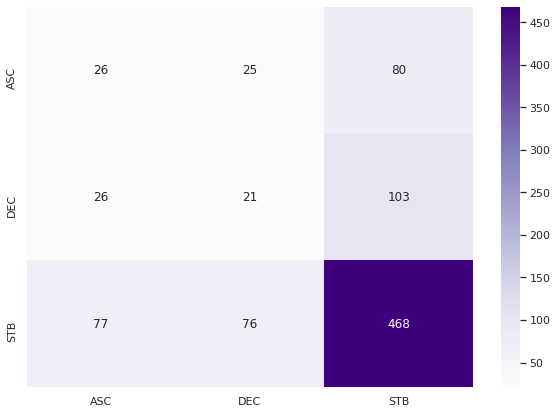

In [61]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(score_census["Level1Cat"], score_nc["Level1Cat_nc"], labels=["ASC", "DEC", "STB"])

df_cm = pd.DataFrame(cm, index = [i for i in ["ASC", "DEC", "STB"]],
                  columns = [i for i in ["ASC", "DEC", "STB"]])

plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Purples", fmt='g')

plt.savefig(os.path.join("Figures", 'confusion_Asc.png'), transparent=True, dpi=300)


In [62]:
!pip install pretty_confusion_matrix

ERROR: Could not find a version that satisfies the requirement pretty_confusion_matrix (from versions: none)
ERROR: No matching distribution found for pretty_confusion_matrix


In [63]:
# from pretty_confusion_matrix import pp_matrix
# cmap = "PuRd"
# x = pp_matrix(df_cm, cmap=cmap)
#plt.savefig(os.path.join("Figures", 'confusion_asc_better.png'), transparent=True, dpi=300)


ModuleNotFoundError: No module named 'pretty_confusion_matrix'

In [64]:
# Merge

comparison = pd.merge(df_score_filt, score_census, right_on="LSOA11CD", left_on="LSOA11CD_nc")

In [65]:
comparison["comparison"] = ""
comparison["status_change"] = "changed"

for i in range(len(comparison)):
    if comparison.loc[i, "Level1Cat"]== "ASC" and comparison.loc[i, "Level1Cat_nc"]== "ASC" :
        comparison.loc[i, "comparison"]="ASC_ASC"
        comparison.loc[i, "status_change"]="same"
    if comparison.loc[i, "Level1Cat"]== "ASC" and comparison.loc[i, "Level1Cat_nc"]== "DEC" :
        comparison.loc[i, "comparison"]="ASC_DEC"
    if comparison.loc[i, "Level1Cat"]== "ASC" and comparison.loc[i, "Level1Cat_nc"]== "STB" :
        comparison.loc[i, "comparison"]="ASC_STB"
    
    if comparison.loc[i, "Level1Cat"]== "DEC" and comparison.loc[i, "Level1Cat_nc"]== "ASC" :
        comparison.loc[i, "comparison"]="DEC_ASC"
    if comparison.loc[i, "Level1Cat"]== "DEC" and comparison.loc[i, "Level1Cat_nc"]== "DEC" :
        comparison.loc[i, "comparison"]="DEC_DEC"
        comparison.loc[i, "status_change"]="same"
    if comparison.loc[i, "Level1Cat"]== "DEC" and comparison.loc[i, "Level1Cat_nc"]== "STB" :
        comparison.loc[i, "comparison"]="DEC_STB"
        
    if comparison.loc[i, "Level1Cat"]== "STB" and comparison.loc[i, "Level1Cat_nc"]== "ASC" :
        comparison.loc[i, "comparison"]="STB_ASC"
    if comparison.loc[i, "Level1Cat"]== "STB" and comparison.loc[i, "Level1Cat_nc"]== "DEC" :
        comparison.loc[i, "comparison"]="STB_DEC"
    if comparison.loc[i, "Level1Cat"]== "STB" and comparison.loc[i, "Level1Cat_nc"]== "STB" :
        comparison.loc[i, "comparison"]="STB_STB"
        comparison.loc[i, "status_change"]="same"


In [66]:
comparison["comparison"].value_counts()

STB_STB    468
DEC_STB    103
ASC_STB     80
STB_ASC     77
STB_DEC     76
DEC_ASC     26
ASC_ASC     26
ASC_DEC     25
DEC_DEC     21
Name: comparison, dtype: int64

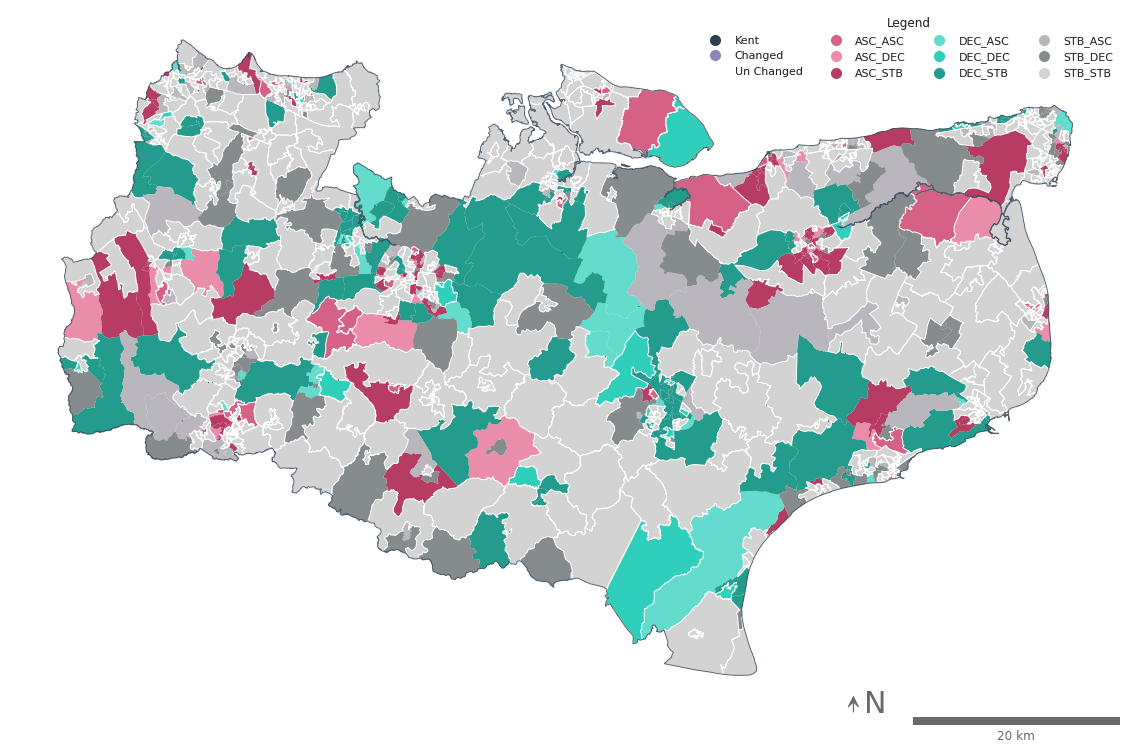

In [67]:
change = comparison.loc[comparison['status_change'] == "changed"]
no_change = comparison.loc[comparison['status_change'] == "same"]

ASC_ASC = comparison.loc[comparison['comparison'] == "ASC_ASC"]
ASC_DEC = comparison.loc[comparison['comparison'] == "ASC_DEC"]
ASC_STB = comparison.loc[comparison['comparison'] == "ASC_STB"]

DEC_ASC = comparison.loc[comparison['comparison'] == "DEC_ASC"]
DEC_DEC = comparison.loc[comparison['comparison'] == "DEC_DEC"]
DEC_STB = comparison.loc[comparison['comparison'] == "DEC_STB"]

STB_ASC = comparison.loc[comparison['comparison'] == "STB_ASC"]
STB_DEC = comparison.loc[comparison['comparison'] == "STB_DEC"]
STB_STB = comparison.loc[comparison['comparison'] == "STB_STB"]


# Set axes
fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")


ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
#df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.1)

# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=1000, linewidth=1)

# change
#change.plot(ax=ax, edgecolor="#8B88B6", facecolor="None", linewidth=1, linestyle='--', zorder=100)
no_change.plot(ax=ax, edgecolor="white", facecolor="None", linewidth=1, linestyle='-', zorder=100)

# Add basemap
#ctx.add_basemap(ax, crs=kent_2018.crs.to_string(), source=ctx.providers.CartoDB.Positron)

# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

ASC_ASC.plot(ax=ax, color ="#d56187", edgecolor="None" )
ASC_DEC.plot(ax=ax, color ="#E98DAA" , edgecolor="None" )
ASC_STB.plot(ax=ax, color ="#B63C63" , edgecolor="None" )

DEC_ASC.plot(ax=ax, color ="#63dbcd" , edgecolor="None" )
DEC_DEC.plot(ax=ax, color ="#2fcfbc" , edgecolor="None" )
DEC_STB.plot(ax=ax, color ="#239b8d", edgecolor="None" )

STB_ASC.plot(ax=ax, color ="#B9B7BD" , edgecolor="None" )
STB_DEC.plot(ax=ax, color ="#868B8E" , edgecolor="None" )
STB_STB.plot(ax=ax, color ="lightgrey", edgecolor="None" )

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='#2c3e50')
l2 = plt.scatter([],[], s=100, marker='o', color='#8B88B6')
l3 = plt.scatter([],[], s=100, marker='o', color='white')

l4 = plt.scatter([],[], s=100, marker='o', color='#d56187')
l5 = plt.scatter([],[], s=100, marker='o', color='#E98DAA')
l6 = plt.scatter([],[], s=100, marker='o', color='#B63C63')

l7 = plt.scatter([],[], s=100, marker='o', color='#63dbcd')
l8 = plt.scatter([],[], s=100, marker='o', color='#2fcfbc')
l9 = plt.scatter([],[], s=100, marker='o', color='#239b8d')

l10 = plt.scatter([],[], s=100, marker='o', color='#B9B7BD')
l11 = plt.scatter([],[], s=100, marker='o', color='#868B8E')
l12 = plt.scatter([],[], s=100, marker='o', color='lightgrey')

labels = ["Kent", "Changed", "Un Changed",
         "ASC_ASC", "ASC_DEC", "ASC_STB",
         "DEC_ASC", "DEC_DEC", "DEC_STB",
         "STB_ASC", "STB_DEC", "STB_STB"]

legend = ax.legend([l1, l2,l3, l4, l5, l6, l7, l8, l9, l10, l11, l12], labels, ncol=4, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
ax.add_artist(legend)

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_change_in_asc.png'), transparent=True, dpi=300)

# Show map
plt.show()

# 5. Hot Spot

In [68]:
from pysal.explore import esda 
import libpysal as lps
import pysal as ps
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import geopandas as gpd
from esda.moran import Moran_Local
from splot.esda import lisa_cluster

In [69]:
W_queen = lps.weights.Queen.from_dataframe(df_score)
W_queen.transform = 'r'

In [70]:
#Calculate spatial lag

score_Lag = lps.weights.lag_spatial(W_queen, df_score['score_chg'])

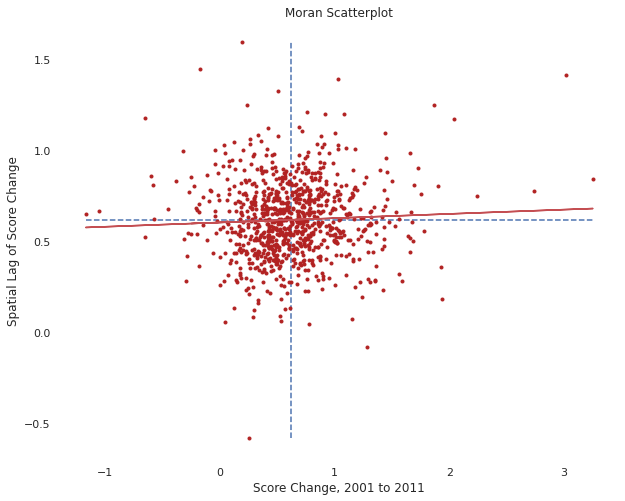

<Figure size 432x288 with 0 Axes>

In [71]:
score=df_score['score_chg']
b,a = np.polyfit(score, score_Lag, 1)
f, ax = plt.subplots(1, figsize=(10, 8))
ax.grid(False)
plt.plot(score, score_Lag, '.', color='firebrick')

plt.vlines(score.mean(), score_Lag.min(), score_Lag.max(), linestyle='--')
plt.hlines(score_Lag.mean(), score.min(), score.max(), linestyle='--')

plt.plot(score, a + b*score, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Score Change')
plt.xlabel('Score Change, 2001 to 2011')
plt.show()
plt.savefig(os.path.join("Figures", 'moran_nc.png'), transparent=True, dpi=300)


In [72]:
#Moran's I value is close to 0, hence csr
W_queen = lps.weights.Queen.from_dataframe(df_score)
mi = esda.moran.Moran(df_score['score_chg'], W_queen)
mi.I

0.023508209653825943

In [73]:
#clusters

lisa = ps.explore.esda.Moran_Local(df_score['score_chg'].values, W_queen, permutations=999)
lisa.q
lisa.p_sim
(lisa.p_sim < 0.05).sum()

89

In [74]:
df_score['lag_DPT'] = lps.weights.lag_spatial(W_queen, df_score['score_chg'])
sigs = df_score['score_chg'][lisa.p_sim <= .05]
W_sigs = df_score['lag_DPT'][lisa.p_sim <= .05]
insigs = df_score['score_chg'][lisa.p_sim > .05]
W_insigs = df_score['lag_DPT'][lisa.p_sim > .05]

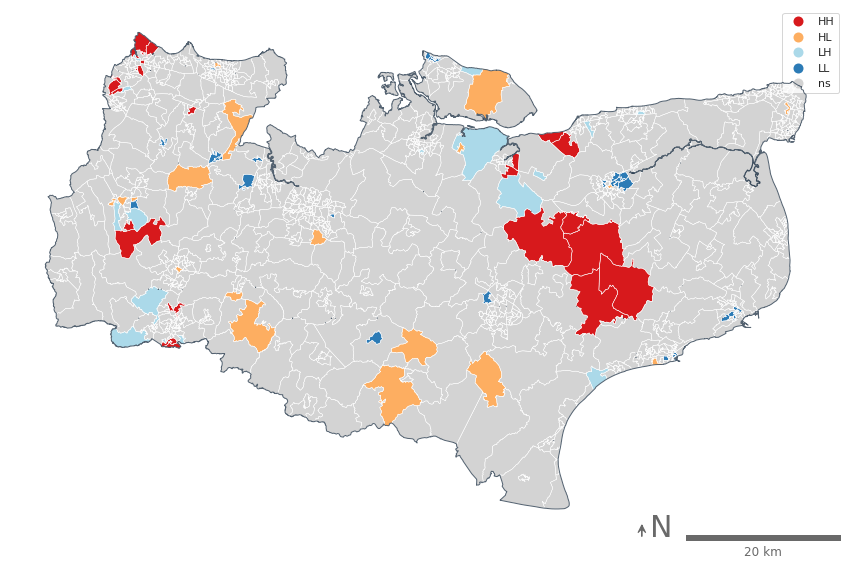

In [75]:
# Visulise previous data on gentrification

# Plot shapfiles

# Set axes
fig, ax = lisa_cluster(lisa, df_score, figsize=(15,15))
ax.set_aspect('equal')
ax.set_facecolor("white")
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
df_score.plot(ax=ax, edgecolor="white", facecolor="None", alpha=0.8, zorder=10, linewidth=0.5)


# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)


# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
 

# Add title
#ax.set_title("Categories of Gentrification for LSOAs in Kent", fontdict={'fontsize': '20','fontweight' : '3'}) 
   
plt.savefig(os.path.join("Figures", 'map_nc_asc_lisa.png'), transparent=True, dpi=300)

# Show map
plt.show()

In [76]:
# Hot spots signifigant

sig_1 = lisa.p_sim < 0.01
sig_5 = lisa.p_sim < 0.05
sig_10 = lisa.p_sim < 0.1

hotspot_1 = sig_1 * lisa.q==1
hotspot_5 = sig_5 * lisa.q==1
hotspot_10 = sig_10 * lisa.q==1


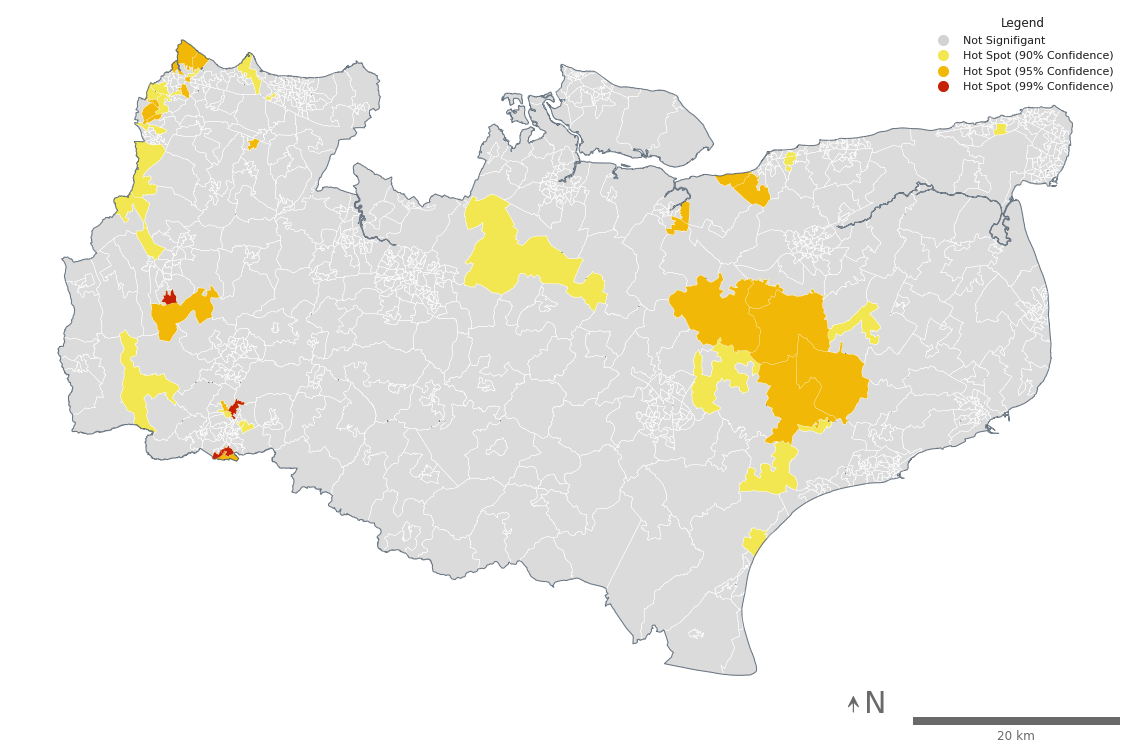

In [77]:
spots_1 = ['Not Signifigant', 'Hot Spot (99%)']
spots_5 = ['Not Signifigant', 'Hot Spot (95%)']
spots_10 = ['Not Signifigant', 'Hot Spot (90%)']

labels_1 = [spots_1[i] for i in hotspot_1*1]
labels_5 = [spots_5[i] for i in hotspot_5*1]
labels_10 = [spots_10[i] for i in hotspot_10*1]

fig, ax = plt.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.set_facecolor("white")
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False) 

# Plot outlines of LSOA'S 
df_score.plot(ax=ax, edgecolor="white", facecolor="lightgrey", alpha=0.8, zorder=1, linewidth=0.5)


# Plot outline of Kent
outline.plot(ax=ax, edgecolor="#2c3e50", facecolor="None", alpha=0.8, zorder=10, linewidth=1)


from matplotlib import colors
hmap = colors.ListedColormap(['#C52104', 'None'])
#f, ax = plt.subplots(1, figsize=(9, 9))
df_score.assign(cl=labels_1).plot(column='cl', categorical=True,  k=2, cmap=hmap, linewidth=0.1, ax=ax, edgecolor='white', legend=False, zorder=10)
hmap_5 = colors.ListedColormap(['#F2B807', 'None'])
df_score.assign(cl=labels_5).plot(column='cl', categorical=True,  k=2, cmap=hmap_5, linewidth=0.1, ax=ax, edgecolor='white', legend=False, zorder=5)
hmap_10 = colors.ListedColormap(['#F2E750', 'None'])
df_score.assign(cl=labels_10).plot(column='cl', categorical=True,  k=2, cmap=hmap_10, linewidth=0.1, ax=ax, edgecolor='white', legend=False)


# Add scale bar
# Points on the sane lattitude, one longitude apart
points = gpd.GeoSeries([Point(51.5072, 0.1276), Point(52.5072, 0.1276)], crs=4326)
# Calculate difference
distance_meters = points[0].distance(points[1])
# Plot
ax.add_artist(ScaleBar(distance_meters, color="dimgray", location="lower right")) 

# Add north arrow

ax.text(x=620000, y=113000,s='N', fontsize=30, color="dimgray")
ax.arrow(619000, 113000, 0, 1000, length_includes_head=True, head_width=1000, head_length=500, overhang=2, zorder=100, color="dimgray")

# Add legend
l1 = plt.scatter([],[], s=100, marker='o', color='lightgrey')
l2 = plt.scatter([],[], s=100, marker='o', color='#F2E750')
l3 = plt.scatter([],[], s=100, marker='o', color='#F2B807')
l4 = plt.scatter([],[], s=100, marker='o', color='#C52104')

labels = ["Not Signifigant", "Hot Spot (90% Confidence)","Hot Spot (95% Confidence)", "Hot Spot (99% Confidence)"]
legend = ax.legend([l1, l2,l3, l4], labels, loc="upper right", title='Legend', facecolor="white", edgecolor="white")    
ax.add_artist(legend)

plt.savefig(os.path.join("Figures", 'map_asc_hotspot_nc.png'), transparent=True, dpi=300)


ax.set_axis_off()
plt.show()